# In this notebook, I generated the panels for Figure 9 of the report
These images show the general results of Random Forest classification of GBM dataset.

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import re

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(7, 4))
sc.settings.verbosity = 3

-----
anndata     0.10.8
scanpy      1.10.1
-----
PIL                         10.2.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
astunparse                  1.6.3
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
bottleneck                  1.3.7
brotli                      1.0.9
certifi                     2024.08.30
cffi                        1.16.0
charset_normalizer          2.0.4
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.1
cycler                      0.10.0
cython_runtime              NA
dask                        2024.7.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
executing                   0.8.3
fastjsonschema              NA
fqdn                        NA
h5py                        3.9.0
id

**Note:** I am importing the predictions that I saved in the notebook `Random_Forest_testing.ipynb`.

In [3]:
predictions = pd.read_csv('/hpc/hers_basak/rnaseq_data/Silettilab/icoratella/final_useful_datasets/random_forest_predictions.csv', index_col = 0)

#### This code adds an additional column to the predictions to consolidate single tumors denoted by A, B, C, etc., into a single label. This is done to improve the clarity and visual presentation of the data.
Specifically, the function:

- **Removes the final letter if present, unless the suffix is '_ATAC' or '_nuclei'**.
-  **If the suffix is '_ATAC' or '_nuclei', and there is a single letter before the underscore, it removes that letter**.


In [4]:
def remove_trailing_letter(sample):
    sample = re.sub(r'^([A-Za-z0-9]+)([A-Za-z])(_ATAC)$', r'\1\3', sample)
    sample = re.sub(r'^([A-Za-z0-9]+)([A-Za-z])(_nuclei)$', r'\1\3', sample)
    sample = re.sub(r'^([A-Za-z0-9]+)([A-Za-z])$', r'\1', sample)
    return sample
predictions['stackedSamples'] = predictions['Sample'].apply(remove_trailing_letter)

#### PANEL A

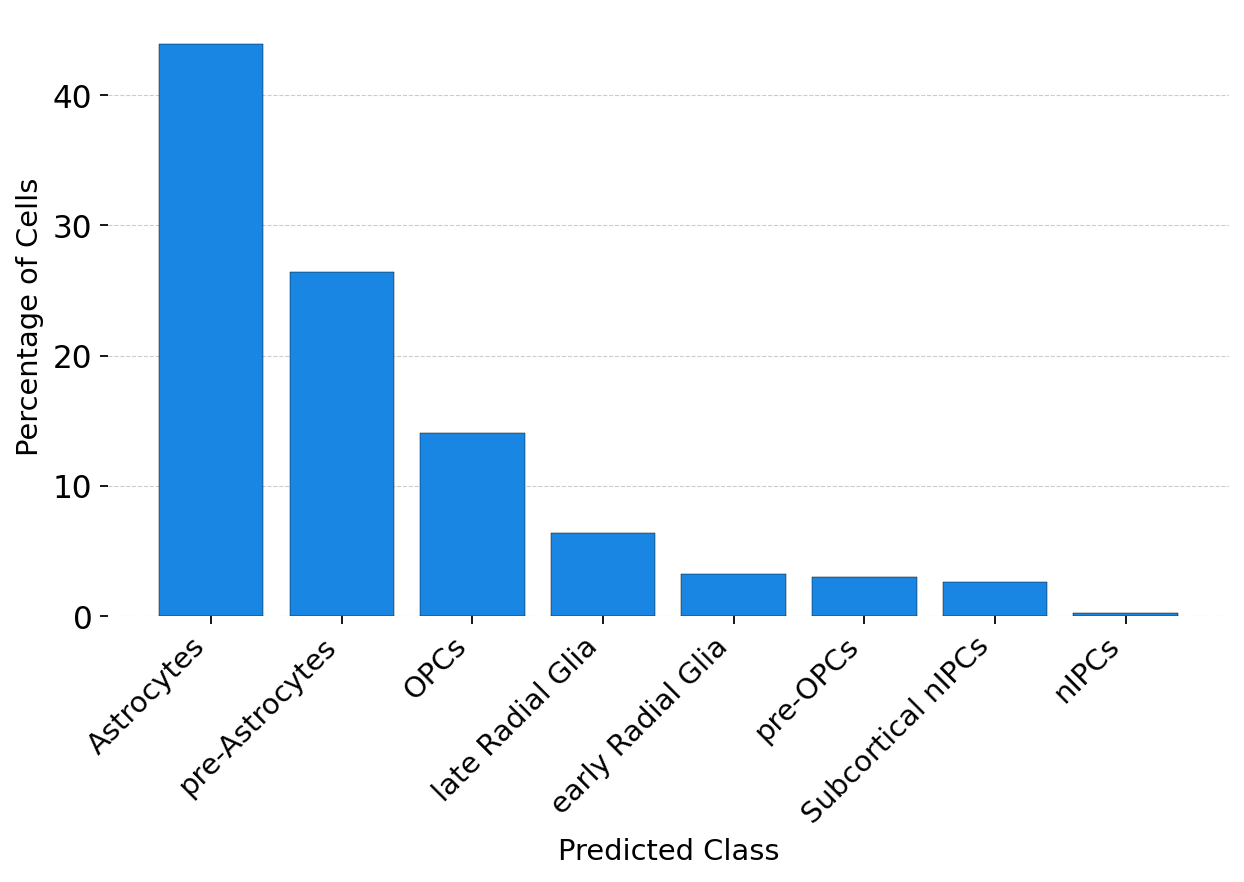

In [5]:
counts = predictions['predictions_RF'].value_counts()
percentages = (counts / counts.sum()) * 100

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(percentages.index, percentages.values, color='#1a86e3', edgecolor='black', linewidth=0.2)
ax.set_xlabel('Predicted Class', fontsize=13)
ax.set_ylabel('Percentage of Cells', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=13)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5) 
ax.xaxis.grid(False)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# uncomment this to save high quality figure
#plt.savefig('fig_9_panel_A.png', dpi = 600)

#### PANEL B

In [6]:
palette_dict = {
    'nIPCs': "#a0e85b",
    'early Radial Glia': "#30766a",
    'late Radial Glia': "#8c0da4",
    'Astrocytes': "#fa41c7",
    'OPCs': "#a2e0dd",
    'pre-OPCs': "#333a9e",
    'pre-Astrocytes': "#1a86e3",
    'Subcortical nIPCs': "#e3a0fa"
}

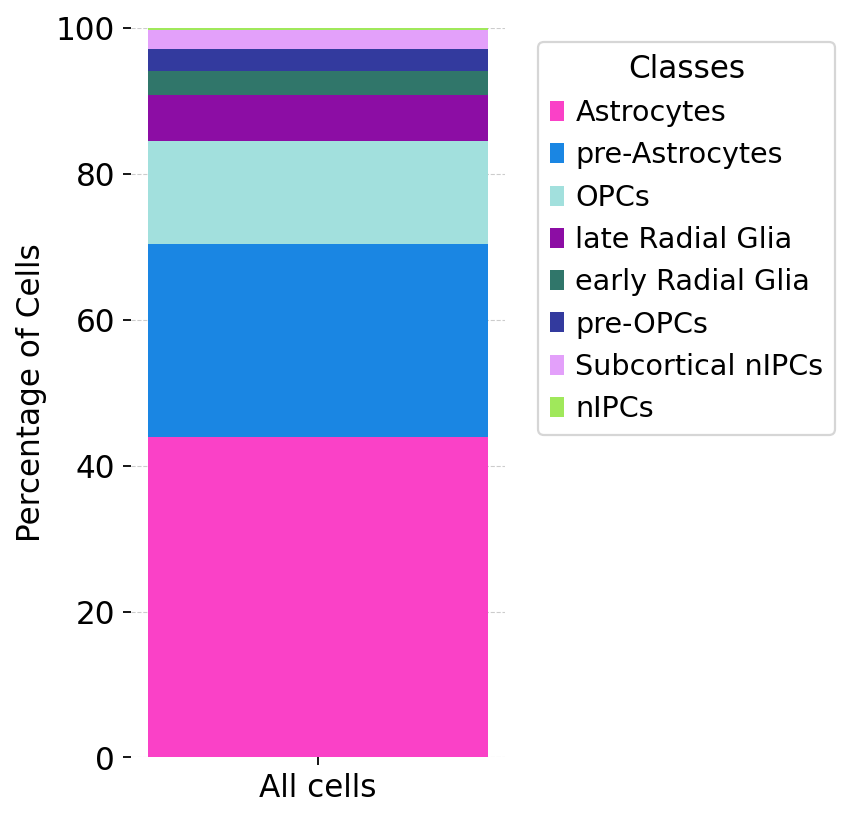

In [7]:
fig, ax = plt.subplots(figsize=(3, 6))

bottom = 0
for class_label, pct in percentages.items():
    ax.bar(['All cells'], [pct], bottom=bottom, label=class_label, color=palette_dict[class_label])
    bottom += pct

ax.yaxis.grid(True, linestyle='--', linewidth=0.5) 
ax.xaxis.grid(False)
ax.set_axisbelow(True)

ax.set_ylabel('Percentage of Cells')
ax.set_ylim([0, 100])
ax.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# uncomment this to save high quality figure
#plt.savefig('fig_9_panel_B.png', dpi = 600)

#### PANEL C

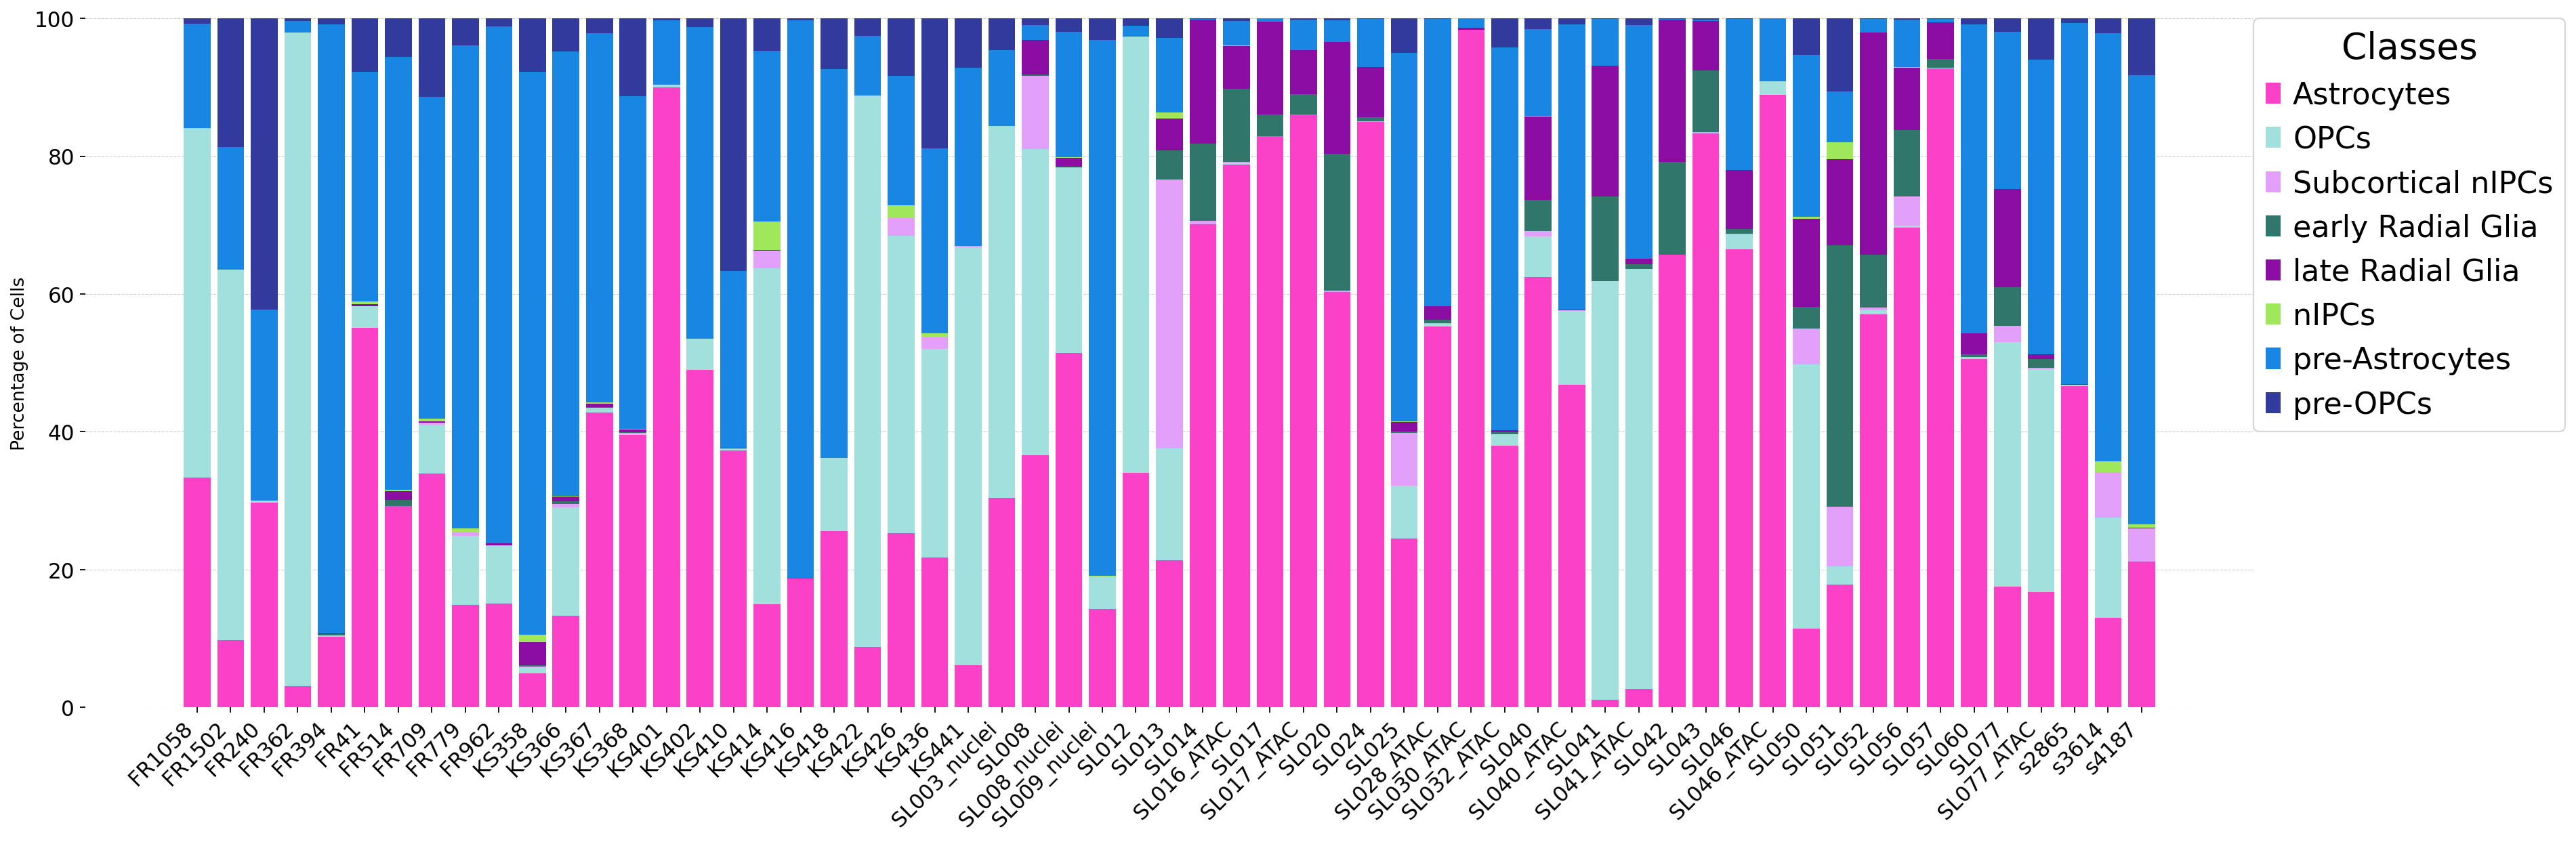

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = predictions.groupby(['stackedSamples', 'predictions_RF']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(24, 8))
added_labels = set()

for idx, (sample, row) in enumerate(percentages.iterrows()):
    bottom = 0
    for class_label, pct in row.items():
        if class_label not in added_labels:
            ax.bar(idx, pct, bottom=bottom, label=class_label, color=palette_dict.get(class_label, '#333333'))
            added_labels.add(class_label)
        else:
            ax.bar(idx, pct, bottom=bottom, color=palette_dict.get(class_label, '#333333'))
        bottom += pct

ax.set_ylabel('Percentage of Cells', fontsize=12)
ax.set_xticks(range(len(percentages)))
ax.set_xticklabels(percentages.index, rotation=45, ha='right', fontsize=14)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5) 
ax.xaxis.grid(False)
ax.set_axisbelow(True)
ax.set_ylim([0, 100])

legend = ax.legend(title='Classes', title_fontsize='24', fontsize='20', bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# uncomment this to save high quality figure
#plt.savefig('fig_9_panel_C.png', dpi = 600)